# Clustering with Gaussian Mixture Models (GMM)
So far in the module, we reviewed the algorithms that assign observations to only a single cluster. This type of clustering algorithms are called hard clustering. There exists another type of clustering algorithms such that each observation is assigned to several clusters with associated probabilities. This strand of clustering algorithms is called soft clustering. In this checkpoint, we present a soft clustering algorithm called Gaussian Mixture Models (in short GMM) which belongs to a general class of probabilistic clustering algorithms.

The main advantages of GMM are as follows:

It's a soft clustering algorithm. So, we can assess the confidence of the cluster assignments by investigating the probabilities.
It doesn't assume anything about the geometry of the clusters unlike k-means. So, it can also tackle with the non-linear geometries.

# What is Gaussian Mixture Models (GMMs)

**Gaussian Mixture Models (GMMs)** aim to find the data generating processes by assuming that the data is generated by a mixture of several **Gaussian distributions**. Gaussian distribution may sound unfamiliar to you but don't worry, it's the very **normal distribution** itself. Hence, GMM aims to find the normal distributions that generated our data. More specifically, GMM searches for the Gaussian distributions for each of the clusters in the data. Since the full data is the combination of all of the clusters, GMM models the data as a mixture of the Gaussian distributions where the number of these distributions is equal to the number of clusters in the data.

The assumption of our data being generated by a mix of normal distributions may sound too strong. But, if you recall the **Central Limit Theorem**, it states that if we have enough samples from a population, the means of the samples converge to a normal distribution no matter the original distribution of the population. Counting on this theorem, GMM searches for the means and the standard deviations of the Gaussian (normal) distributions. More formally, each observation $x_i$ is assumed to be drawn from the mixture of these Gaussians: 

$$p(x_i)=\sum_{c=1}^{k}\phi_c\mathcal{N}(\mu_c,\sigma_c)$$

where $\sum_{c=1}^{k}\phi_c=1$.

GMM treats each data point $x_i$ as a linear combination of the $k$ Gaussians. Each Gaussian $c$ has a weight that is denoted by $\phi_c$, which represents the strength of that Gaussian. GMM imposes a contraint on the weights such that they all sum up to 1. 

Notice that we need to determine three types of parameters. These are the weights of each Gaussian $\phi_c$, the means of the Gaussians $\mu_c$, and the covariances of each Gaussian $\sigma_c$. Next, let's discuss the GMM algorithm and how we estimate these parameters:

# The algorithm of GMM using Expectation Maximization

To estimate the parameters $\phi_c$, $\mu_c$ and $\sigma_c$, GMM uses an algorithm called **Expectation Maximization (EM)**. EM is a well-known algorithm dates back to 1977 and it can be used in several other contexts not just in GMM. We'll see how GMM uses EM in the following algorithm steps:

1. The first step is to initialize the parameters of each Gaussian. Random initialization is a common choice. But more guided initialization methods are also available. For example, one can initialize the $\mu_c$ of each Gaussian by running k-means first and then using the centroids of the k-means solution as the initial values of $\mu_c$. The other parameters can be initialized as follows:

    $$\phi_c = \frac{Number\: of\: points\: in\: the\: c^{th}\: cluster}{Total\: number\: of\: points\: in\: the\: data}$$ 
 
    $$\sigma_c = covariance(c^{th}\: cluster)$$

    After this initialization step, **GMM repeats the following steps until the changes in the parameters of the distributions are small enough or the log likelihood value stops to increase above a threshold**.

2. **Estimation**: In this step, the ownership of each data point is calculated given the current values of the parameters of the Gaussians. For each data point $x_i$, we compute the probabilities of that point belongs to a particular cluster c. In this step, we compute the probabilities by using the parameters of the Gaussians as follows:

    $$\lambda(x_{ic})=\frac{\phi_c\mathcal{N}(x_i|\mu_c,\sigma_c)}{\sum_{j=1}^{k}\phi_j\mathcal{N}(x_i|\mu_j,\sigma_j)}$$

    $\lambda(x_{ic})$ is called **responsibility** and it indicates how much the Gaussian c is responsible in generating $x_i$.

3. **Maximization**: In this step, the parameters of the Gaussians are updated given the current ownership probabilities of the data points to maximize the log likelihood of the data. In updating the parameters, we use all the data points in the data by weighting them according to the probability assigned to that point by a particular Gaussian. For example, we update the mean of the Gaussian c by taking the average of the weighted sum of the data points where the weights are the probabilities assigned by the Gaussian c. In the limit, this maximizes the probabilities of data points within the clusters. More formally, the parameters are updated as follows:

    $$\mu_c^{new} = \frac{1}{N_c}\sum_{i=1}^{N}\lambda(x_{ic})x_i$$

    $$N_c = \sum_{i=1}^{N}\lambda(x_{ic})$$

    $$\sigma_c^{new} = \frac{1}{N_c}\sum_{i=1}^{N}\lambda(x_{ic})(x_i - \mu_c^{new})(x_i - \mu_c^{new})^T$$

    $$\phi_c^{new} = \frac{N_c}{N}$$

4. The last step is to evaluate the log likelihood of the data. Likelihood measures the probability of the data being generated by the Gaussians with the parameters calculated in the previous steps. GMM's goal is to maximize this log likelihood:

    $$ln(p(X | \phi_c, \mu_c, \sigma_c)) = \sum_{i=1}^{N}ln(\sum_{c=1}^{k}\phi_c\mathcal{N}(x_i|\mu_c,\sigma_c))$$

    The algorithm stops if the log likelihood or the parameter values stop to increase above a threshold. Otherwise, GMM iterates over by going back to the step 2 above.

The gif below demonstrates how the algorithm works on an example dataset:

![gmm algorithm](./assets/gmm_algo.gif)

# Assumptions of GMM

There are two important assumptions that GMM makes:

1. The first one is that there are k distributions that generate the data. In effect, this is equivalent to say that there are exactly k clusters in the data.

2. The other assumption is that all of these k distributions are Gaussians. However, GMM doesn't put constraints on the parameters of these Gaussians but estimates them such that the likelihood of the data being generated by these k Gaussians is maximized.

If one of the assumptions fails to hold in our data, then GMM may produce nonuseful clusters. Even though it has these two assumptions, GMM is still a quite flexible method for clustering. Just notice that, GMM releases two of the assumptions of k-means that we saw in the checkpoint where we discussed the k-means algorithm. Specifically, GMM doesn't assume that the clusters are isotropic and have the similar variances. From this perspective, one can even think of k-means as a special case of GMM. 

# Speed

Time complexity of the GMM algorithm is $O(knT)$, where T denotes the number of iterations, k denotes the number of Gaussians, n denotes the number of observations. If you remember the time complexity of the k-means algorithm, you notice that the time complexities of the GMM and k-means are the same. However in practice, the termination conditions of GMM are hard to determine and in theory it can take infinitely long time to converge. This is because GMM will try to optimize its estimates even though the gain is infinitesimally small. So, we usually restrict the number of iterations of the algorithm by setting `max_iter` parameter of the `GaussianMixture` to a reasonable number. The case for k-means is different as k-means only tries to find the centroids and there are $2^k$ alternatives at most. Although, in practice it takes a few dozen steps. So, k-means' number of iterations is naturally limited.

As you can see, GMM might become an expensive algorithm in terms of computational time. Hence, applying it to very high-dimensional datasets may take too long to converge. When we have very high-dimensional datasets, we may consider applying a dimensionality reduction technique first to reduce the dimension of the data before applying GMM.

# GMM in action

Now, we run the GMM on the Iris dataset. Recall that previous clustering algorithms we discussed in this module were run by using the `cluster` module of the scikit-learn. However, GMM is available through another module of scikit-learn which is called `mixture`. In general, this module implements several Gaussian Mixture Models.

We first import the packages we use:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

As usual, we load the Iris dataset from scikit-learn's `datasets` module. GMM is also sensitive to the scale of the data. So, we standardize our variables before fitting GMM:

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Now, we define `GaussianMixture` object with `n_components=3`, since we have three types of flowers in the dataset. You can play with this parameter to see how GMM forms the clusters for different values of this parameter:

In [3]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In order to visualize the results, we apply PCA and use the first two components. In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. The colors denote the true classes.

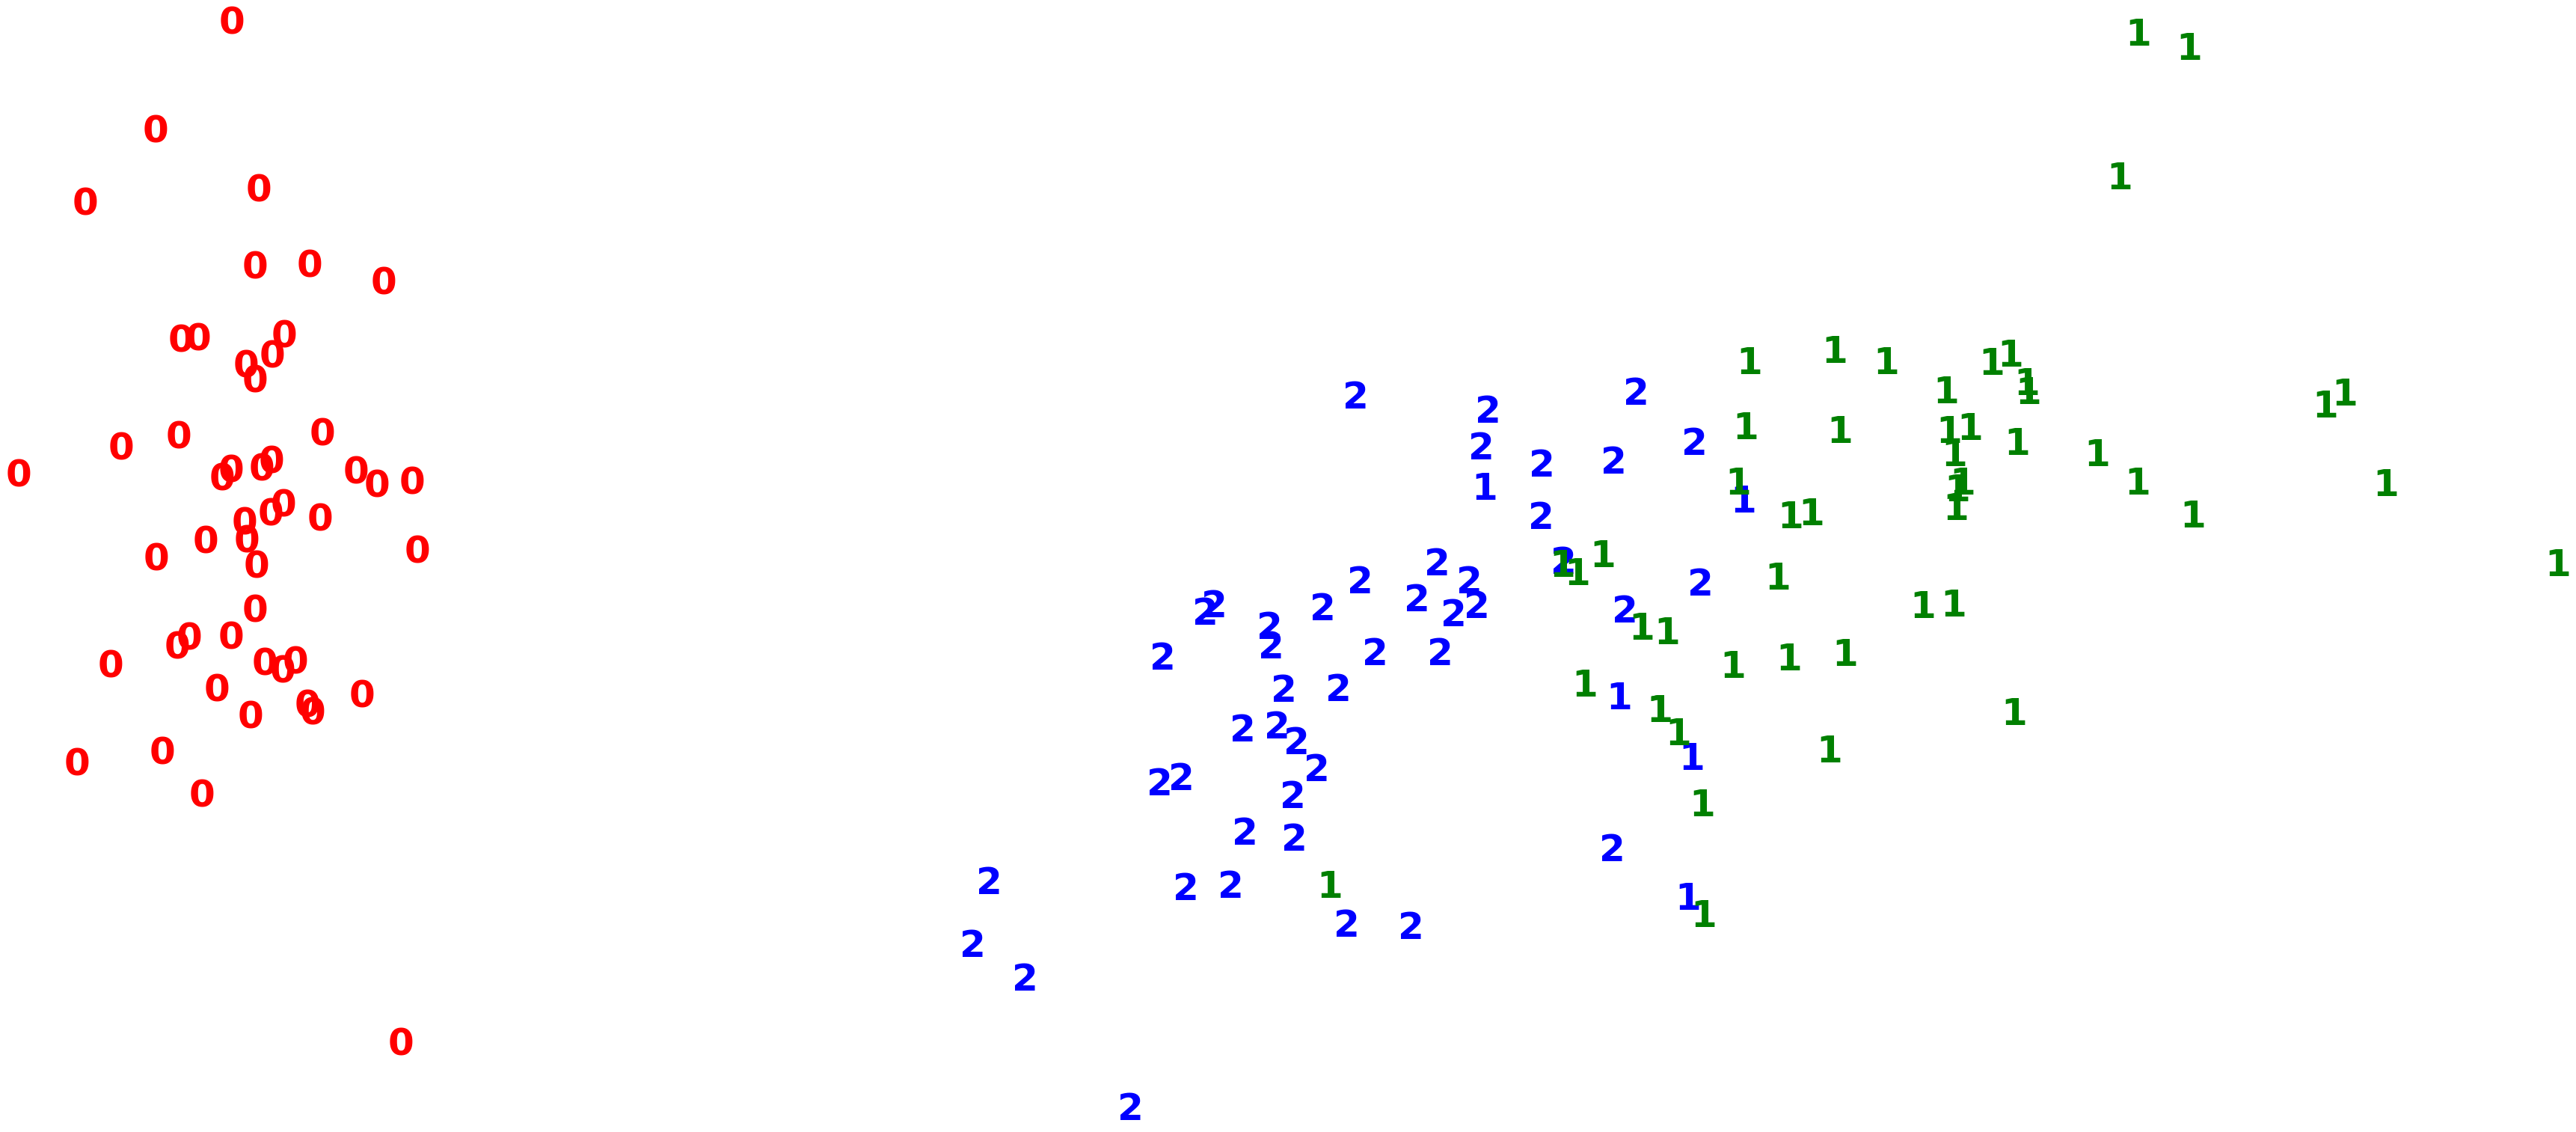

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It seems that the GMM solution even separated the linearly non-separable two classes. Let's get the ARI and silhouette scores of this solution:

In [5]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.9038742317748124
The silhoutte score of the GMM solution: 0.37416491866541235


According to the ARI, the GMM solution is very close to 1 which indicates that it did a fairly good job! The ARI score of the GMM solution is by far the highest among the clustering techniques we applied prior to this checkpoint. However, this is not a fair comparison. The scikit-learn implementation of the `GaussianMixture` uses k-means in the initialization of the means of the Gaussians. So, we should also give credit to k-means as this time GMM raises on the shoulders of it.

Let's tabulate the contingency table to see how well the GMM performed. But before that, let's re-label the clusters for the sake of reading the contingency table more easily:

In [6]:
# re-labeling
clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])

pd.crosstab(y,clusters)

col_0,0,1,2
row_0,,,
0,0,50,0
1,45,0,5
2,0,0,50


Very cool. Only 5 observations seem to be assigned to the wrong cluster. But how about the silhouette score? It's only 0.37 and it's the lowest among the clustering techniques we applied prior to this checkpoint. This is due to the fact that the two classes among the three classes are not linearly separable and they are very close to each other in the high dimensional space. The more an algorithm distinguishes these two classes, the less it gets a silhouette score. Hence, measuring the performances of the clustering algorithms on the Iris dataset using silhouette score misleads us. Confirming this, recall that in the previous checkpoint, DBSCAN achieved the highest silhouette score with a two cluster solution!

Last but not least, we demonstrate the soft clustering aspect of the GMM. We draw the same graph above this time by resizing the points according to the highest probability assigned to them by the winning cluster:

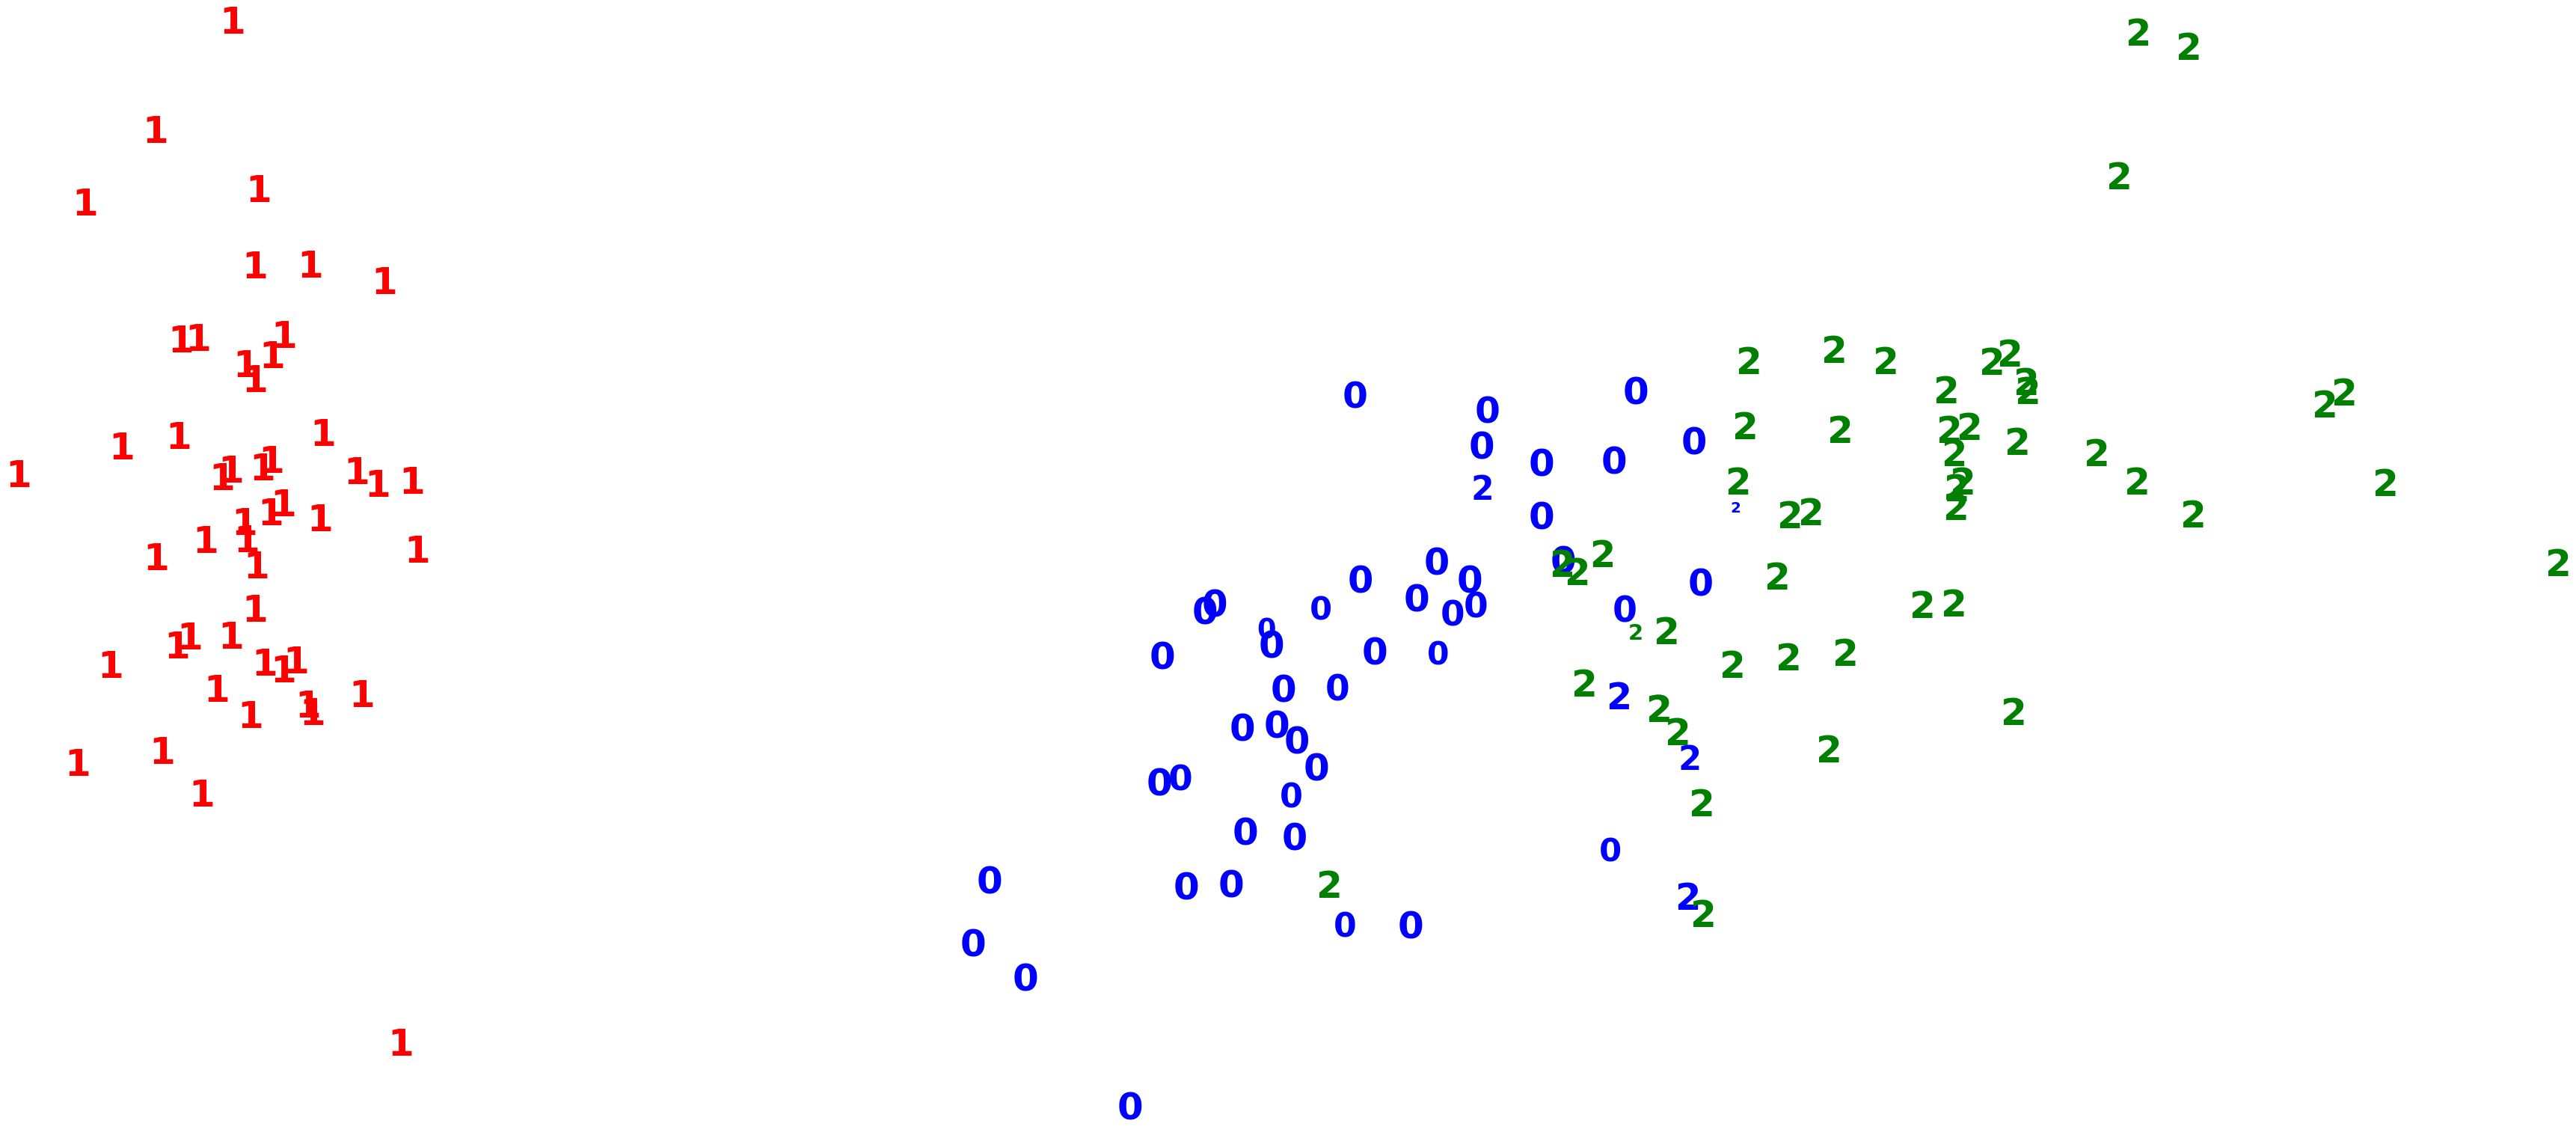

In [7]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we can expect, the probabilities assigned to the observations of the different classes that are very close to each other are lower than more isolated observations.

# Assignment
In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:

Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1) Apply GMM to the heart disease data by setting n_components=2. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?

2) GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

    -full: This is the default. Each component has its own general covariance matrix.
    -tied: All components share the same general covariance matrix.
    -diag: Each component has its own diagonal covariance matrix.
    -spherical: Each component has its own single variance.
    
Try all of these. Which one does perform better in terms of ARI and silhouette scores?

In [8]:
# Import SQL Alchemy engine
from sqlalchemy import create_engine

In [9]:
# use credentials to start a connection
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

The dataset needs some preprocessing. So, apply the following code before working with the dataset:

In [10]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [11]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### 1) Apply GMM to the heart disease data by setting n_components=2. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?

In [12]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

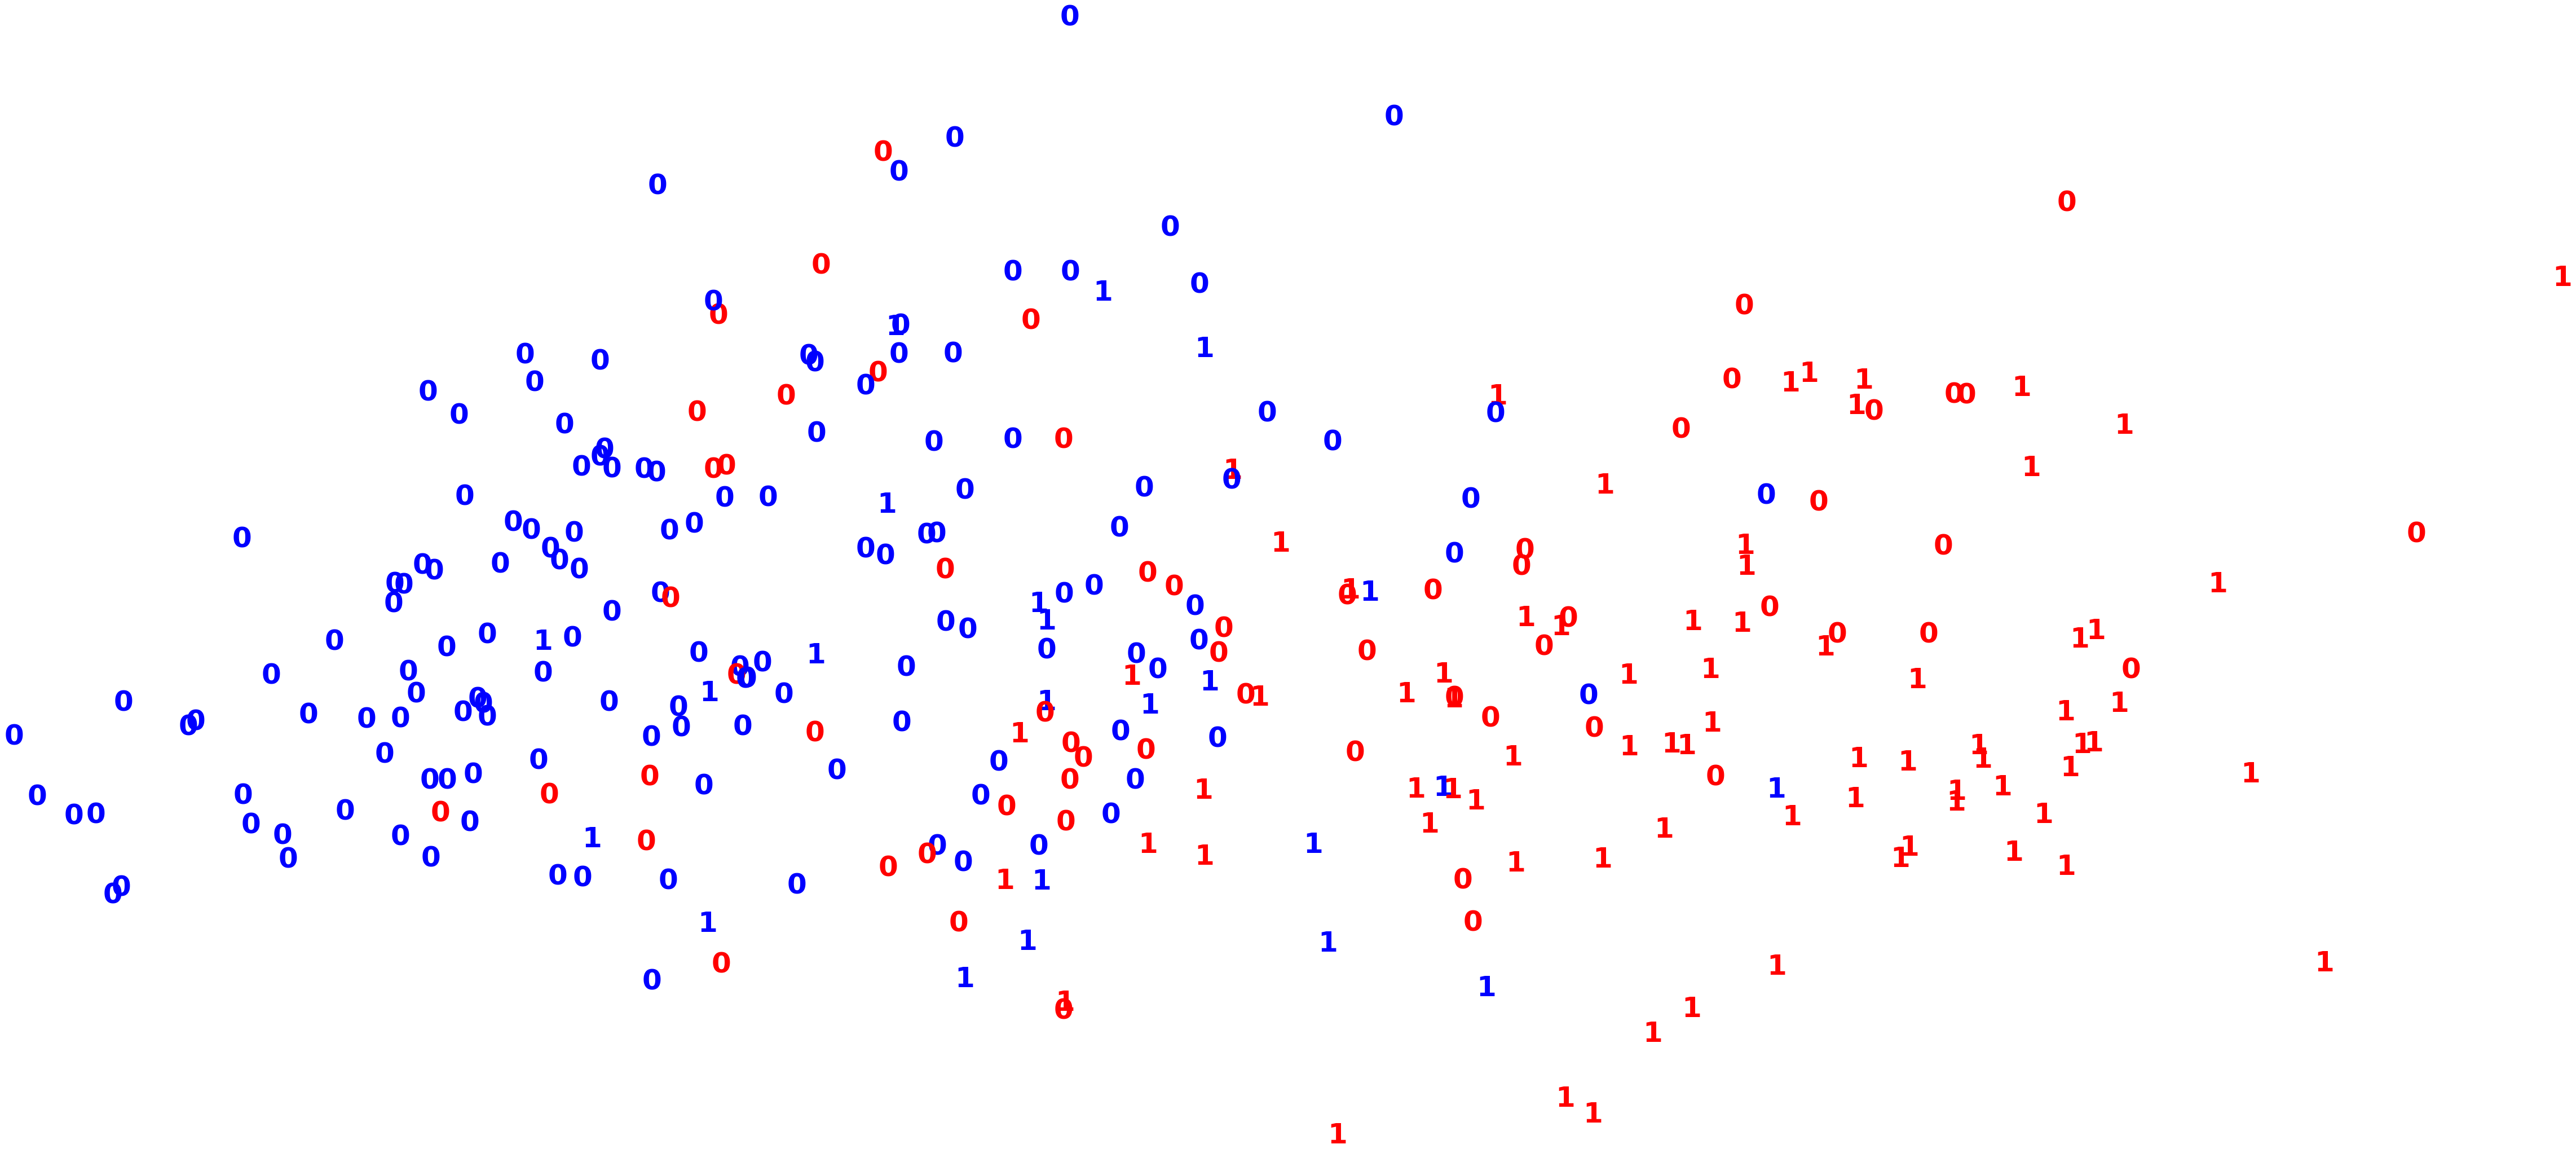

In [13]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [14]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


GMM scores are comparable with hierarchical models in various methods, but generally underperforms.
GMM scores is generally lower than k-means clusters.

### 2) GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

    -full: This is the default. Each component has its own general covariance matrix.
    -tied: All components share the same general covariance matrix.
    -diag: Each component has its own diagonal covariance matrix.
    -spherical: Each component has its own single variance.
    
Try all of these. Which one does perform better in terms of ARI and silhouette scores?

In [15]:
# Defining the agglomerative clustering - full - Default
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

print("------------------------------------------------------")


# Defining the agglomerative clustering - tied
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type = 'tied')

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

print("------------------------------------------------------")


# Defining the agglomerative clustering - diag
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type = 'diag')

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

print("------------------------------------------------------")


# Defining the agglomerative clustering - spherical
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type = 'spherical')

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

print("------------------------------------------------------")

ARI score with covariance_type=full: 0.18389186035089963
Silhouette score with covariance_type=full: 0.13628813153331445
------------------------------------------------------
ARI score with covariance_type=tied: 0.18389186035089963
Silhouette score with covariance_type=tied: 0.13628813153331445
------------------------------------------------------
ARI score with covariance_type=diag: 0.18389186035089963
Silhouette score with covariance_type=diag: 0.13628813153331445
------------------------------------------------------
ARI score with covariance_type=spherical: 0.20765243525722465
Silhouette score with covariance_type=spherical: 0.12468753110276873
------------------------------------------------------


ARI score of covariance type spherical is higher than the others and its silhouette score is lower than the others. The scores of the other covariance types are the same.